<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAB-02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN<Title>
</div>

<h2>Nhóm 23</h2>
<h3>Thông tin nhóm:</h3>


<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Công Đắt     | 20120454  |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Lê Trần Như Ngọc       | 21120296  |
| Lê Thị Minh Phương | 21120533  |

</center>


<h2>Giảng viên hướng dẫn:</h2>

### **Thầy Lê Nhựt Nam**

<h2>Chủ đề:</h2>

## ***Phân tích và trực quan giá cổ phiếu của top 6 ngân hàng có trị thương hiệu tốt nhất Việt Nam***

---


# **Phần C: Khám phá mối quan hệ trong dữ liệu.**
## **C03. Tương quan giữa giá trị thương hiệu với thông tin cổ phiếu & Ứng dụng Moving Average để bắt tín hiệu Mua - Bán cổ phiếu**

#### ***Sơ lược nội dung:***
1. Liệu có sự tương quan nào giữa thông tin cổ phiếu với giá trị thương hiệu của top 5 ngân hàng có giá trị thương hiệu cao nhất trong giai đoạn 2021-2023?
2. Moving Average
    >    2.1. Moving Average là gì? Ứng dụng của Moving Average trong dữ liệu thời gian nói chung, và dữ liệu cổ phiếu nói riêng?  
    >    2.2. Xác định tín hiện giao dịch (mua/ bán) bằng Moving Average


## **I. Chuẩn bị** 

### 1. Nhập các thư viện

In [1]:
# Nhập các thư viện cần dùng
import numpy as np
import pandas as pd

import warnings
# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output

from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### 2. Nhập dữ liệu

In [2]:
full_df = pd.read_csv("./Data/full_data_processed.csv")
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df = full_df.set_index(pd.DatetimeIndex(full_df['Date'].values))
full_df.shape

(8963, 9)

## **II. Phân tích và trực quan hoá.** <a id=”ii-phân-tích-và-trực-quan-hoá″></a>

### **1. Liệu có sự tương quan nào giữa thông tin cổ phiếu với giá trị thương hiệu của top 5 ngân hàng có giá trị thương hiệu cao nhất trong giai đoạn 2021-2023?**

#### **Thông tin đang quan tâm:**
Sự tương quan giữa thông tin cổ phiếu với giá trị thương hiệu của các ngân hàng trong giai đoạn 2021-2023.

#### **Hướng tiếp cận:**
- Thu thập thông tin về giá trị thương hiệu của từng ngân hàng.
- Tiền xử lý dữ liệu chứng khoán cho giai đoạn 2021-2023 đề phù hợp với mục đính so sánh.
- Minh hoạ bằng các biểu đồ phù hợp.
- Sử dụng thống kê kiểm định để kiểm chứng lại cho câu hỏi trên.

#### **Cách trực quan để trả lời câu hỏi:**
- Trực quan dữ liệu về giá trị thương hiệu của các ngân hàng qua từng năm.
- Trực quan dữ liệu về cổ phiếu của các ngân hàng đó trong thời gian tương ứng.
- Tính toán Correlation matrix và vẽ heatmap để xem xét sự tương quan.

>---

#### **1.1. Giá trị thương hiệu là gì? Được tính như thế nào?**
(Nguồn: [Brand Finance - Việt Nam 100 năm 2023](https://static.brandirectory.com/reports/brand-finance-vietnam-100-2023-vn-preview.pdf))

&nbsp; &nbsp; **Thương hiệu:** Thương hiệu được định nghĩa là một tập hợp các nhãn hiệu và IP (Intellectual Property - "Quyền Sở Hữu Trí Tuệ") liên quan có thể được sử dụng để tận dụng nhận thức của tất cả các bên liên quan nhằm mang lại nhiều lợi ích kinh tế cho công ty.

&nbsp; &nbsp; **Giá trị thương hiệu:** "Giá trị thương hiệu đề cập đến giá trị hiện tại của các khoản thu liên quan cụ thể đến danh tiếng thương hiệu. Các tổ chức sở hữu và kiểm soát các khoản thu nhập này bằng cách sở hữu các quyền thương hiệu." 

Theo phương pháp định giá của Brand Finance, giá trị của một thương hiệu được xem xét thông qua: *Sức ảnh hưởng thương hiệu* và *Sức mạnh thương hiệu*, kết hợp với xác định doanh thu theo thương hiệu (cụ thể là một tỷ lệ doanh thu của công ty mẹ có thể phân bổ cho thương hiệu được đề cập) và dự báo các khoản doanh thu đó bằng cách phân tích doanh thu lịch sử, dự báo của nhà phân tích tài sản và tốc độ tăng trưởng kinh tế.

***a. Sức ảnh hưởng thương hiệu***: 

"[...]những gì thương hiệu đã mang lại trong thỏa thuận phí bản quyền. Điều này được củng cố bởi một phân tích về cách các thương hiệu tác động đến lợi nhuận trong ngành so với các thương hiệu chung. Từ đó ta có phạm vi phí bản quyền có thể được tính trong ngành này cho các thương hiệu (ví dụ: khoảng từ 0% đến 2% doanh thu)."  

***b. Sức mạnh thương hiệu:***   

"[...]xem xét ba trụ cột cốt lõi: 
- ***“Đầu vào”*** là các hoạt động hỗ trợ sức mạnh tương lai của thương hiệu; 
- ***“Tài sản”*** là nhận thức hiện tại có nguồn gốc từ nghiên cứu thị trường của chúng tôi và các đối tác dữ liệu khác; 
- ***“Đầu ra”*** là thước đo hiệu suất liên quan đến thương hiệu như thị phần. 

Mỗi thương hiệu được chỉ định một điểm Chỉ số Sức mạnh Thương hiệu (BSI) trên thang điểm 100, điểm này được đưa vào tính toán giá trị thương hiệu. Dựa trên điểm số, mỗi thương hiệu được chỉ định Xếp hạng thương hiệu tương ứng lên đến AAA+ ở định dạng tương tự như xếp hạng tín dụng."

#### **1.2. Top 5 ngân hàng có giá trị thương hiệu tốt nhất Việt Nam trong giai đoạn 2021-2023**
- **Nguồn:** Dữ liệu được tổng hợp từ ***"Báo cáo thường niên về các thương hiệu giá trị nhất và mạnh nhất Việt Nam"*** [năm 2022](https://static.brandirectory.com/reports/brand-finance-vietnam-50-2022-preview.pdf) và [năm 2023](https://static.brandirectory.com/reports/brand-finance-vietnam-100-2023-vn-preview.pdf), kết hợp với thông tin về top 500 Ngân hàng có giá trị thương hiệu tốt nhất thế giới [năm 2022](https://static.brandirectory.com/reports/brand-finance-banking-500-2022-preview.pdf) và [năm 2023](https://static.brandirectory.com/reports/brand-finance-banking-500-2023-preview.pdf)

- Lưu trữ: Các thông tin được ghi nhận và lưu trữ trong file `./Data/brand_value.csv` (Top 5 ngân hàng được xác định theo dữ liệu năm 2023)



In [3]:
brand_value_df = pd.read_csv("./Data/brand_value.csv", header=0)
print(brand_value_df.info())
brand_value_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bank                    15 non-null     object 
 1   Stock symbol            15 non-null     object 
 2   Year                    15 non-null     int64  
 3   World rank              15 non-null     int64  
 4   Vietnam rank            15 non-null     int64  
 5   Brand value ($M)        14 non-null     float64
 6   Brand value change (%)  9 non-null      float64
dtypes: float64(2), int64(3), object(2)
memory usage: 972.0+ bytes
None


,Bank,Stock symbol,Year,World rank,Vietnam rank,Brand value ($M),Brand value change (%)
0,Agribank,AGR,2021,173,1,1152.0,NaN
1,Vietcombank,VCB,2021,180,2,1048.0,NaN
2,VietinBank,CTG,2021,216,3,793.0,NaN
3,BIDV,BID,2021,246,5,NaN,NaN
4,Techcombank,TCB,2021,270,6,524.0,NaN
5,Agribank,AGR,2022,157,1,1412.0,22.5
6,Vietcombank,VCB,2022,162,2,1344.0,28.2
7,VietinBank,CTG,2022,184,3,1064.0,34.2
8,Techcombank,TCB,2022,196,4,945.0,80.4
9,BIDV,BID,2022,212,6,831.0,NaN


Định nghĩa các cột: 
- `Bank`: Tên ngân hàng.

- `Stock symbol`: Mã cổ phiếu của ngân hàng.

- `Year`: Thời điểm xếp hạng.

- `World rank` Thứ hạng của Ngân hàng trong Top 500 ngân hàng có giá trị thương hiệu tốt nhất thế giới.

- `Vietnam rank`: Thứ hạng của Ngân hàng trong Top các thương hiệu giá trị nhất Việt Nam.

- `Brand value ($M)`: Giá trị thương hiệu (tính theo triệu đô la Mỹ).

- `Brand value change`: Tỉ lệ thay đổi giá trị thương hiệu so với năm liền trước.

In [4]:
# Định nghĩa màu cho các Ngân hàng dựa trên màu của chính Ngân hàng đó
colors = {
    'AGR': '#ca0333',
    'VCB': '#55A845',
    'CTG': '#0e7cd0',
    'TCB': '#ec2027',
    'BID': '#006b69',
}

#### **1.3. Xem xét sự thay đổi giá trị thương hiệu của 5 ngân hàng này**

In [5]:
# Lọc bỏ các dòng có giá trị None (NaN) trong cột Brand value ($M)
brand_value_df = brand_value_df.dropna(subset=['Brand value ($M)'])

# Chuyển đổi cột Year thành kiểu số nguyên
brand_value_df['Year'] = brand_value_df['Year'].astype(int)

# Tạo biểu đồ đường cho mỗi ngân hàng
fig = px.line(
    brand_value_df,
    x='Year',
    y='Brand value ($M)',
    color='Stock symbol',
    markers=True,
    title='Brand Value Over Time by Bank',
    labels={
        'Year': 'Year',
        'Brand value ($M)': 'Brand Value ($M)'
    },
    hover_data={
        'Bank': True,
        'Brand value change (%)': True,
        'World rank': True,
        'Vietnam rank': True
    },
)

# Gán màu từ từ điển màu cho từng ngân hàng
for bank, color in colors.items():
    fig.for_each_trace(lambda trace: trace.update(line=dict(color=color)) if trace.name == bank else (), selector=dict(name=bank))

# Thêm chú thích cho từng đường biểu đồ
fig.update_layout(legend_title="Bank")

fig.update_yaxes(tick0=500, dtick=500)

# Đảm bảo các giá trị năm là số nguyên
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=brand_value_df['Year'].min(),
        dtick=1
    ),
    yaxis_title='Brand Value ($M)',  # Thêm tiêu đề cho trục y
    width=800,
    height=500
)
fig.show()

##### **Nhận xét:**
- Nhìn chung, cả 5 ngân hàng đều có sự gia tăng giá trị thương hiệu đáng kể qua từng năm.
- Hầu hết các ngân hàng tăng trưởng đều, trừ Agribank có giai đoạn chững lại và chỉ tăng nhẹ (2%) từ năm 2022-2023.
- Vietcombank là ngân hàng có sự tăng trưởng vượt bậc trong giai đoạn 2022-2023.

#### **1.4. Xem xét dữ liệu cổ phiếu của các ngân hàng trong khoảng thời gian này (tính theo quý)**

In [6]:
full_df['Year'] = full_df['Date'].dt.year
# Lọc dữ liệu cho các năm 2021, 2022, và 2023
bank_2123_df = full_df[full_df['Year'].isin([2021, 2022, 2023])]
bank_2123_df = bank_2123_df.query("`Stock symbol` != 'VPB'")

In [7]:
# Chuyển cột Date sang định dạng thời gian và trích xuất quý và năm
bank_2123_df['Date'] = pd.to_datetime(bank_2123_df['Date'])
bank_2123_df['Quarter'] = bank_2123_df['Date'].dt.quarter
bank_2123_df['Year'] = bank_2123_df['Date'].dt.year

# Tạo cột mới kết hợp quý và năm
bank_2123_df['Quarter-Year'] = 'Q' + bank_2123_df['Quarter'].astype(str) + '-' + bank_2123_df['Year'].astype(str)

# Tạo stock_in_quarter_df
stock_in_quarter_df = bank_2123_df.groupby(['Quarter-Year', 'Stock symbol', 'Bank']).agg({
    'Price': 'mean',
    'Open': 'mean',
    'High': 'max',
    'Low': 'min',
    'Vol.': 'sum',
    'Change %': 'sum'
}).reset_index()

stock_in_quarter_df.sample(5)

,Quarter-Year,Stock symbol,Bank,Price,Open,High,Low,Vol.,Change %
1,Q1-2021,BID,BIDV,34745.796552,34820.170690,40046.3,28887.2,160250000.0,-9.37
49,Q4-2021,VCB,Vietcombank,76114.439394,76286.136364,83767.0,72464.0,85555480.0,5.32
59,Q4-2023,VCB,Vietcombank,85287.692308,85298.461538,89800.0,80100.0,71164000.0,-8.18
51,Q4-2022,BID,BIDV,31780.861538,31728.323077,37625.0,24847.0,126296980.0,16.66
35,Q3-2022,AGR,Agribank,10823.854687,10808.587500,12995.1,8442.1,55435280.0,6.43


In [8]:
# Thêm cột Year từ cột Quarter-Year
stock_in_quarter_df['Year'] = stock_in_quarter_df['Quarter-Year'].apply(lambda x: int(x.split('-')[1]))
stock_in_quarter_df['Quarter'] = stock_in_quarter_df['Quarter-Year'].str.split('-').str[0]
# Lấy danh sách các năm
years = stock_in_quarter_df['Year'].unique()

# Vẽ biểu đồ
fig1 = px.bar(stock_in_quarter_df, x="Quarter", y="Change %",
             title="Change of Top 5 banks by quarter", 
             color="Stock symbol", barmode='group', facet_col="Year")

fig2 = px.bar(stock_in_quarter_df, x="Quarter", y="Vol.",
             title="Volumn of Top 5 banks by quarter", 
             color="Stock symbol", barmode='group', facet_col="Year")

# Tạo biểu đồ boxplot cho từng ngân hàng, chia theo quý và facet_col theo Year
fig3 = px.box(bank_2123_df, x="Quarter", y="Price", color="Stock symbol", facet_col="Year", 
             title="Boxplot for Price of Top 5 banks by quarter", 
             labels={"Quarter":"Quarter","Price": "Price (VND)"},
             hover_data={"Quarter": True, "Price": ":,.2f", "Bank": True, "Year": True})

# Cập nhật layout
fig3.update_layout(
    xaxis_title="Quarter",
    yaxis_title="Price (VND)",
    # height=600,
    # width=1200
)

# Bật lưới trên các facet và đặt lại tickvals cho trục x
fig3.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', tickmode='array', tickvals=[0, 1.5, 2.5, 3.5])

# Gán màu từ từ điển màu cho từng ngân hàng
for i, symbol in enumerate(bank_2123_df['Stock symbol'].unique()):
    fig3.update_traces(marker=dict(color=colors[symbol]), selector=dict(name=symbol))
    fig2.update_traces(marker=dict(color=colors[symbol]), selector=dict(name=symbol))
    fig1.update_traces(marker=dict(color=colors[symbol]), selector=dict(name=symbol))

# Hiển thị biểu đồ
fig1.show()
fig2.show()
fig3.show()




In [9]:
# # Thêm cột Year từ cột Quarter-Year
# stock_in_quarter_df['Year'] = stock_in_quarter_df['Quarter-Year'].apply(lambda x: int(x.split('-')[1]))
# stock_in_quarter_df['Quarter'] = stock_in_quarter_df['Quarter-Year'].str.split('-').str[0]
# # Lấy danh sách các năm
# years = stock_in_quarter_df['Year'].unique()

# # Tạo subplots với hai trục y cho mỗi năm
# fig = make_subplots(
#     rows=3, cols=len(years), 
#     shared_xaxes=True, shared_yaxes=True, 
#     subplot_titles=[f"Change in {year}" for year in years] + [f"Volume in {year}" for year in years] + [f"Boxplot of price in {year}" for year in years],
#     vertical_spacing=0.04, 
#     specs=[[{"secondary_y": False} for _ in years]] * 3
# )

# # Theo dõi ngân hàng đã được thêm vào legend hay chưa
# legend_added = {symbol: False for symbol in colors.keys()}

# # Thêm biểu đồ cột cho Change %
# for i, year in enumerate(years):
#     year_df = stock_in_quarter_df[stock_in_quarter_df['Year'] == year]
#     for stock_symbol in stock_in_quarter_df['Stock symbol'].unique():
#         name = stock_in_quarter_df[stock_in_quarter_df['Stock symbol']== stock_symbol]['Bank'].iloc[0]
#         filtered_df = year_df[year_df['Stock symbol'] == stock_symbol]
#         showlegend = not legend_added[stock_symbol]
#         if not filtered_df.empty:
#             fig.add_trace(
#                 go.Bar(
#                     x=filtered_df['Quarter'],
#                     y=filtered_df['Change %'],
#                     name=f"{name}",
#                     marker_color=colors[stock_symbol],
#                     showlegend=showlegend,
#                 ),
#                 row=1, col=i+1
#             )
#             legend_added[stock_symbol] = True

# # Thêm biểu đồ cột cho Vol.
# for i, year in enumerate(years):
#     year_df = stock_in_quarter_df[stock_in_quarter_df['Year'] == year]
#     for stock_symbol in stock_in_quarter_df['Stock symbol'].unique():
#         name = stock_in_quarter_df[stock_in_quarter_df['Stock symbol']== stock_symbol]['Bank'].iloc[0]
#         filtered_df = year_df[year_df['Stock symbol'] == stock_symbol]
#         if not filtered_df.empty:
#             fig.add_trace(
#                 go.Bar(
#                     x=filtered_df['Quarter'],
#                     y=filtered_df['Vol.'],
#                     name=f"{name}",
#                     marker_color=colors[stock_symbol],
#                     showlegend=False
#                 ),
#                 row=2, col=i+1
#             )

# # Thêm biểu đồ boxplot cho từng ngân hàng theo từng quý và năm
# for i, year in enumerate(years):
#     for stock_symbol in bank_2123_df['Stock symbol'].unique():
#         year_df = bank_2123_df[(bank_2123_df['Year'] == year) & (bank_2123_df['Stock symbol'] == stock_symbol)]
#         if not year_df.empty:
#             fig.add_trace(go.Box(
#                 x=year_df['Quarter'],
#                 y=year_df['Price'],
#                 name=f"{stock_symbol}",
#                 #boxmean='sd',
#                 marker_color=colors[stock_symbol],
#                 showlegend=False,
#                 hovertemplate="Quarter: %{x}<br>Price: %{y:.2f}<extra></extra>"
#             ), row=3, col=i+1)


# # Cập nhật tiêu đề cho các trục x và y
# fig.update_xaxes(title_text="Quarter", row=3)
# fig.update_yaxes(title_text="Change %", row=1, col=1)
# fig.update_yaxes(title_text="Volume", row=2, col=1)
# fig.update_yaxes(title_text="Price (VND)", row=3, col=1)


# # Cập nhật tiêu đề và hiển thị biểu đồ
# fig.update_layout(
#     title_font=dict(size=20),
#     title_text="Stock Performance by Quarter",
#     title_x=0.5, 
#     height=1200,
#     width=1400,
# )

# fig.show()

##### **Nhận xét:**
- **2021**
    - Hầu hết cổ phiếu của các ngân hàng đều có sự thay đổi tích cực trong nửa đầu năm 2021, tuy nhiên vào quý 3 năm 2021 lại ghi nhận sự lao dốc đáng kể, khi có tới 3 ngân hàng chạm mức biến động <-10%. Tuy nhiên, cả 5 ngân hàng đều đã có chuyển biến tích cực trong quý cuối năm 2021.
    - Tuy ghi nhận sự biến động vào quý 3, nhưng tổng khối lượng giao dịch của quý này vẫn giữ ổn định so với các quý khác. Ngoài ra trong suốt năm 2021, VietinBank và Techcombank là hai ngân hàng có khối lượng giao dịch cao vượt trội.
- **2022**: Thị trường ảm đạm và biến động tiêu cực.
    - Khối lượng giao dịch thấp hơn hẳn so với năm 2021, chủ yếu là do khối lượng giao dịch của Techcombank và VietinBank đã ổn định.
    - Các cổ phiếu của 5 ngân hàng này đều lao dốc mạnh (dễ dàng thấy được qua barchart của "Change" và boxplot của "Price"). Đặc biệt là vào quý 2, cả 5 ngân hàng đồng loạt ghi nhận sự sụt giảm. Đáng chú ý là Agribank khi có thời điểm giảm sâu về ~8.000VND/ 1 cổ phiếu (giảm hơn 60% so với quý trước)
- **2023**: Thị trường phục hồi và dần ổn định.
    - So với 2 năm trước đó thì năm 2023 nhìn chung đều ổn định ở cả giá và khối lượng giao dịch. Giá cổ phiếu biến động ít.


**Vấn đề đặt ra là: Liệu những biến động về cổ phiếu như đã phân tích có tác động/ ảnh hưởng đến Giá trị thương hiệu của 5 ngân hàng này hay không? Và nếu có ảnh hưởng thì thông tin nào của cổ phiếu sẽ đóng góp nhiều nhất cho sự tăng trưởng của giá trị thương hiệu?**

#### **1.5. Xem xét ma trận hiệp phương sai**

Ta sẽ gộp 2 bộ dữ liệu đã xử lý ở trên lại với nhau theo Bank, Year, và tính ma trận hiệp phương sai để xem xét sự tương quan của các biến này.

In [10]:
# Merge DataFrames dựa trên các cột 'Stock symbol' và 'Bank', và Year phải khớp
merged_df = pd.merge(brand_value_df, stock_in_quarter_df, on=['Stock symbol', 'Bank', 'Year'], how='inner')

# Xem thông tin của data sau khi merged 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bank                    56 non-null     object 
 1   Stock symbol            56 non-null     object 
 2   Year                    56 non-null     int32  
 3   World rank              56 non-null     int64  
 4   Vietnam rank            56 non-null     int64  
 5   Brand value ($M)        56 non-null     float64
 6   Brand value change (%)  36 non-null     float64
 7   Quarter-Year            56 non-null     object 
 8   Price                   56 non-null     float64
 9   Open                    56 non-null     float64
 10  High                    56 non-null     float64
 11  Low                     56 non-null     float64
 12  Vol.                    56 non-null     float64
 13  Change %                56 non-null     float64
 14  Quarter                 56 non-null     obje

In [11]:
# Lọc ra các cột số
numerical_columns = merged_df.select_dtypes(['int','float']).columns
numerical_columns

Index(['Year', 'World rank', 'Vietnam rank', 'Brand value ($M)',
       'Brand value change (%)', 'Price', 'Open', 'High', 'Low', 'Vol.',
       'Change %'],
      dtype='object')

Ta thấy, loại bỏ cột `Brand value change (%)` vì nó không đóng góp nhiều vào quá trình xem xét tương quan.
Ngoài ra, ta sẽ loại bỏ các cột `Open`, `High`, `Low`, chỉ giữ lại cột `Price` vì cả 4 cột này cùng nói về 1 đại lượng của cổ phiểu là Giá, nên chúng tương quan gần như tuyệt đối với nhau.

In [12]:
merged_df.drop(columns=["Brand value change (%)",'Open','High','Low'], inplace = True)
# Lọc lại các cột số
numerical_columns = merged_df.select_dtypes(['int','float']).columns
numerical_columns

Index(['Year', 'World rank', 'Vietnam rank', 'Brand value ($M)', 'Price',
       'Vol.', 'Change %'],
      dtype='object')

Tiến hành vẽ các ma trận hiệp phương sai và xem xét sự tương quan giữa các biến.

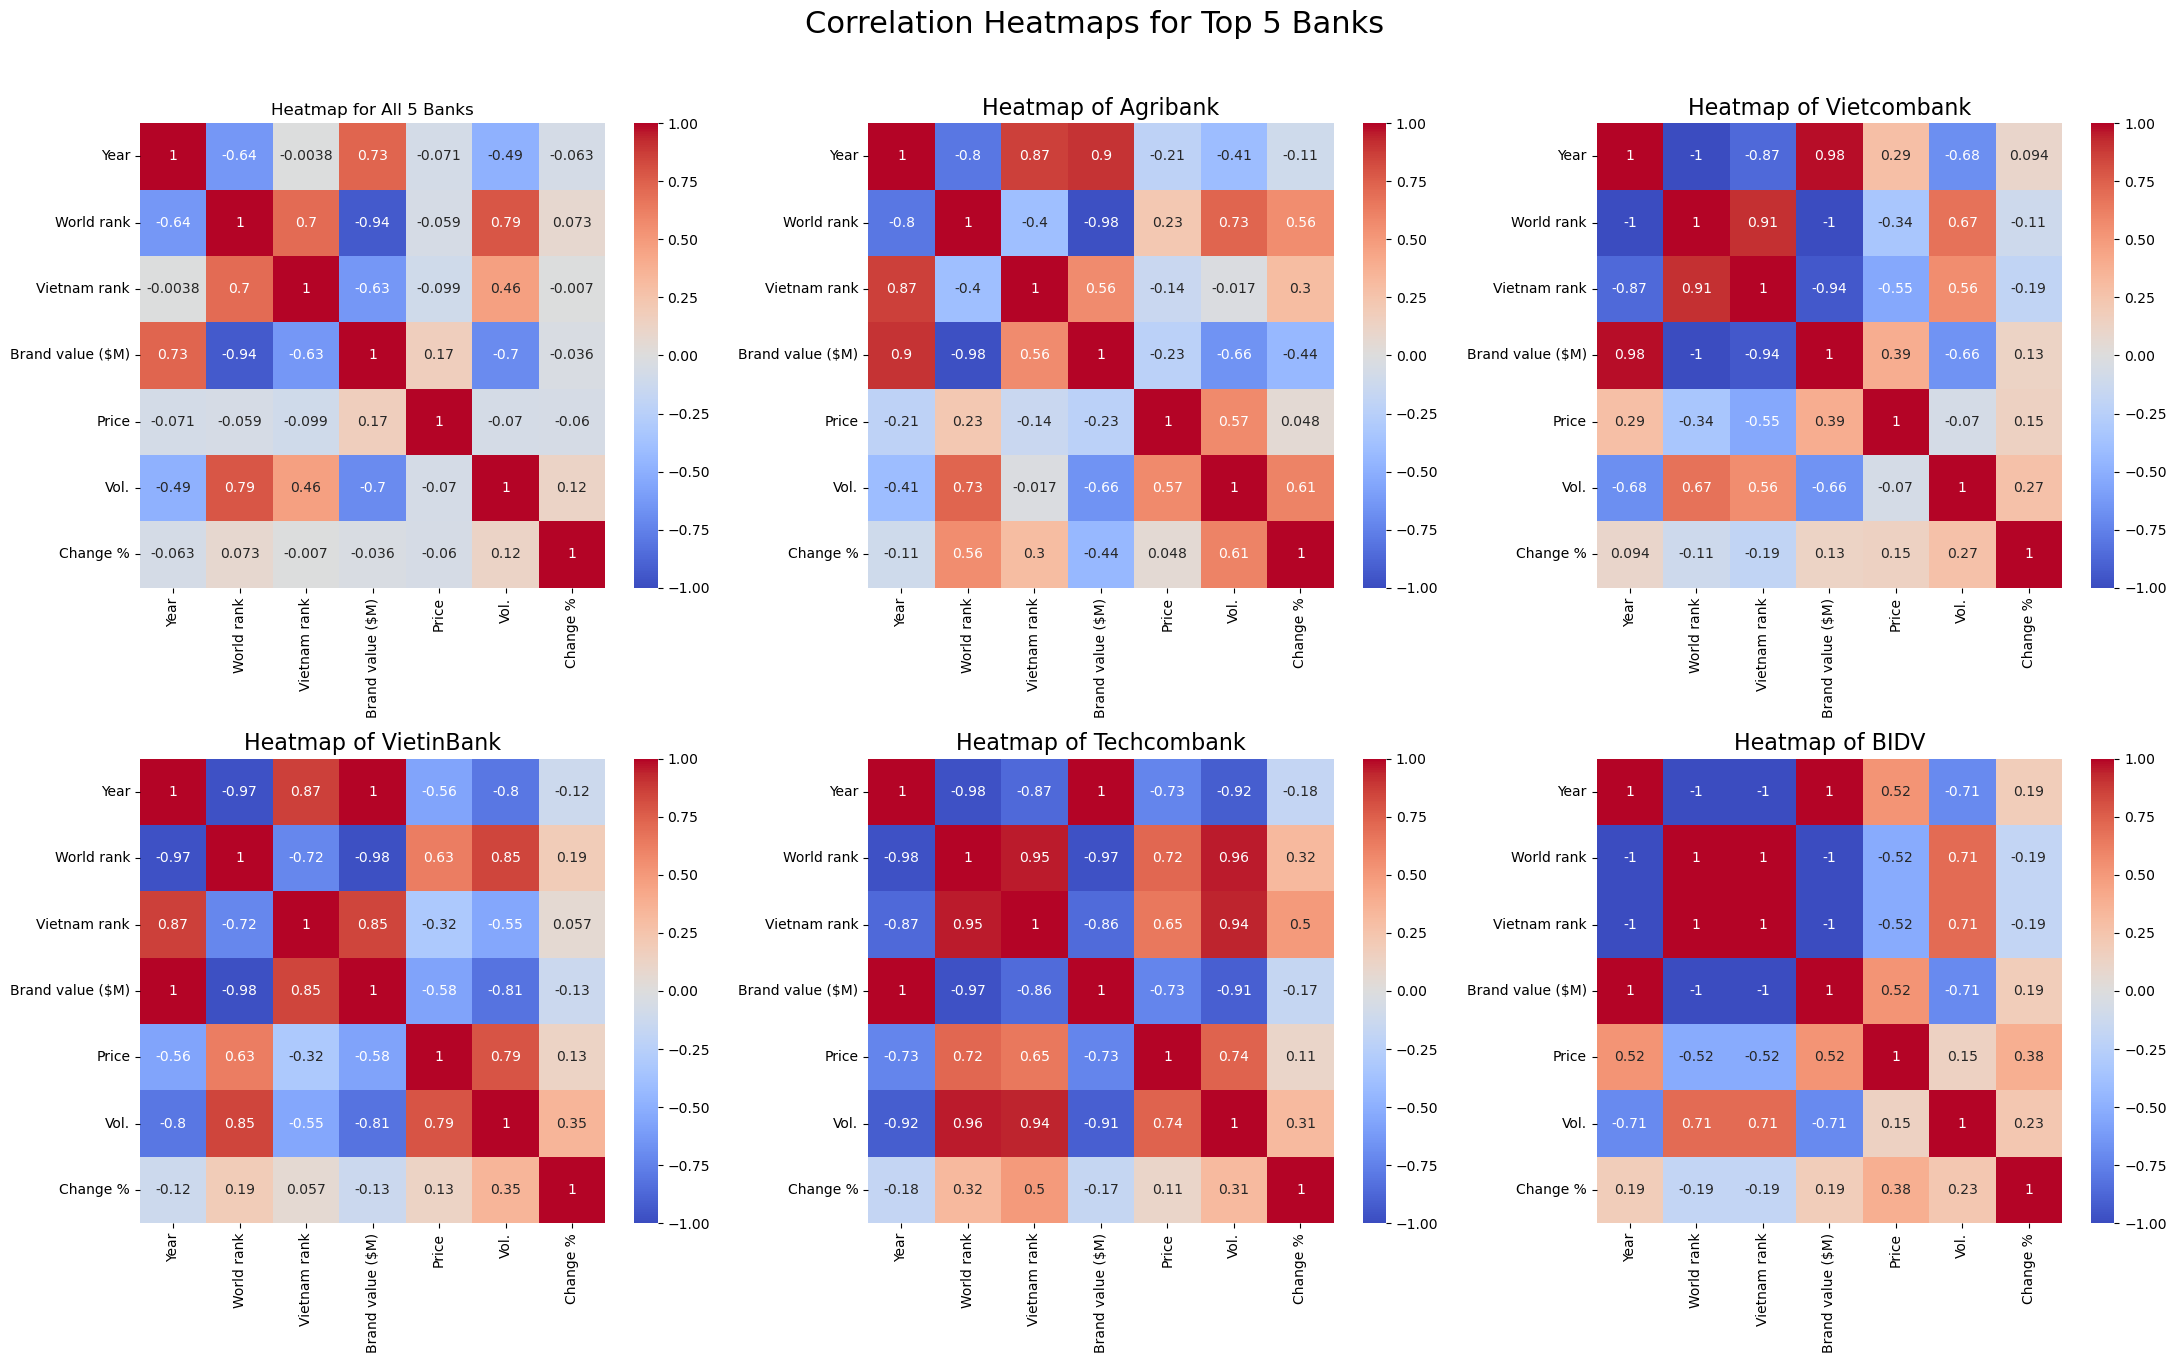

In [13]:
def create_heatmap(df, bank, ax):
    name = df[df['Stock symbol'] == bank]["Bank"].iloc[0]
    
    # Tính toán ma trận tương quan
    draw = df[df['Stock symbol'] == bank]
    corr_matrix = draw[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_title(f"Heatmap of {name}",fontsize=16)

# Số lượng cột và hàng cho các subplots
num_cols = 3
num_rows = 2

# Tạo một figure với các subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 7 * num_rows))
axes = axes.flatten()  # Làm phẳng mảng axes để dễ dàng lặp qua

# Tính toán ma trận tương quan tổng quát 
corr_matrix = merged_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, ax=axes[0], cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_title("Heatmap for All 5 Banks")

# Tạo heatmap cho từng ngân hàng
count = 1
for bank in merged_df['Stock symbol'].unique():
    create_heatmap(merged_df, bank, axes[count])
    count += 1

# Thiết lập tiêu đề tổng quát cho figure
fig.suptitle("Correlation Heatmaps for Top 5 Banks", fontsize=22)

plt.tight_layout(rect=[0, 0.01, 1, 0.96])  # Đảm bảo rằng tiêu đề không bị chèn ép
plt.show()

##### **Nhận xét:**
> Note: Tăng hạng/ Thăng hạng ám chỉ sự thăng cấp bậc (đồng nghĩa với việc giảm về con số).
- ***Khối lượng giao dịch (Vol.)*** có mối tương quan dương mạnh nhất với thứ hạng thế giới (World rank) và thứ hạng tại Việt Nam (Vietnam rank), đồng thời có tương quan âm mạnh với giá trị thương hiệu (Brand value) ***ở hầu hết các ngân hàng***. Điều đó có nghĩa là khi một ngân hàng có khối lượng giao dịch tăng cao thì Giá trị thương hiệu của nó giảm và thứ hạng (về mặt số) của nó tăng. Nói cách khác, Khối lượng giao dịch càng lớn sẽ ảnh hưởng xấu đến giá trị thương hiệu của ngân hàng đó.
- ***Giá cổ phiếu - Price*** và ***Change %*** có sự tương quan với Brand Value và Ranking của một vài ngân hàng, tuy nhiên trên tổng thể thì sự tương quan có âm có dương, chưa nói lên được điều gì.


#### **1.6. Sử dụng thống kê kiểm định để kiểm tra kết quả nhận xét ở trên**

##### **1.6.1. Kiểm định sự ảnh hưởng của "Vol." đến "Brand value ($M)"**

In [14]:
merged_df['intercept'] = 1

X = merged_df[['intercept', 'Vol.']]
y = merged_df['Brand value ($M)']

# gọi mô hình OLS
model = sm.OLS(y, X)

# Fit mô hình
results = model.fit()

# In kết quả của mô hình
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Brand value ($M)   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     50.64
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.67e-09
Time:                        04:48:50   Log-Likelihood:                -386.78
No. Observations:                  56   AIC:                             777.6
Df Residuals:                      54   BIC:                             781.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1403.2605     45.198     31.047      0.0

Dựa trên kết quả kiểm định OLS, ta thấy:

- **R-squared** và **Adj. R-squared**: Giá trị R-squared là `0.484`, Adj. R-squared là `0.474`, chỉ ra rằng mô hình giải thích được khoảng 48.4% sự biến thiên của biến phụ thuộc (Brand value ($M)).

- **F-statistic**: Giá trị F-statistic là 50.64 với mức ý nghĩa rất thấp (2.67e-09), vậy mô hình có ý nghĩa thống kê.

- **p-value (P>|t|)**: Cả Intercept và Vol. đều có `p-value rất nhỏ (≈ 0)`, chỉ ra rằng cả Intercept và Vol. đều có ảnh hưởng đáng kể đến biến phụ thuộc (Brand value ($M)).

- **Hệ số của khối lượng giao dịch (Vol.)**: Hệ số cho biến Vol. là -7.492e-07 với giá trị p rất nhỏ (≈ 0), vậy Vol. cũng có ảnh hưởng đáng kể đến Brand value ($M).

- **Phương trình hồi quy**: Phương trình hồi quy là: Brand value ($M) = 1403.2605 - 7.492e-07 * Vol.

- **Kết luận**: Có thể chấp nhận giả thuyết `Vol.` có ảnh hưởng đáng kể đến Brand value ($M), và ta tính được với mỗi đơn vị tăng của Vol. thì Brand value ($M) giảm đi 7.492e-07.

=> `Vol.` càng cao thì Brand value càng thấp.

##### **1.6.2. Kiểm định sự ảnh hưởng của "Price" đến "Brand value ($M)"**

In [15]:
# Thêm một cột giá trị hằng vào merged_df để tính toán hệ số chặn (intercept)
merged_df['intercept'] = 1

X = merged_df[['intercept', 'Price']]
y = merged_df['Brand value ($M)']

# gọi mô hình OLS
model = sm.OLS(y, X)

# Fit mô hình
results = model.fit()

# In summary của mô hình
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Brand value ($M)   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.517
Date:                Tue, 04 Jun 2024   Prob (F-statistic):              0.223
Time:                        04:48:50   Log-Likelihood:                -404.53
No. Observations:                  56   AIC:                             813.1
Df Residuals:                      54   BIC:                             817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1086.5511     90.193     12.047      0.0

**Kết luận**: Dựa trên kết quả kiểm định OLS, mô hình hồi quy giữa Brand value ($M) và biến Price không đạt được ý nghĩa thống kê `(p-value = 0.223 > 0.05)`. Do đó, không có đủ bằng chứng để kết luận rằng có mối liên hệ đáng kể giữa Change % và Brand value ($M).

##### **1.6.3. Kiểm định sự ảnh hưởng của "Change %" đến "Brand value ($M)"**

In [16]:
# Thêm một cột giá trị hằng vào merged_df để tính toán hệ số chặn (intercept)
merged_df['intercept'] = 1

X = merged_df[['intercept', 'Change %']]
y = merged_df['Brand value ($M)']

# gọi mô hình OLS
model = sm.OLS(y, X)

# Fit mô hình
results = model.fit()

# In summary của mô hình
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Brand value ($M)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.06895
Date:                Tue, 04 Jun 2024   Prob (F-statistic):              0.794
Time:                        04:48:50   Log-Likelihood:                -405.27
No. Observations:                  56   AIC:                             814.5
Df Residuals:                      54   BIC:                             818.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1184.7547     46.423     25.521      0.0

**Kết luận***: Dựa trên kết quả kiểm định OLS, mô hình hồi quy giữa Brand value ($M) và biến Change % không đạt được ý nghĩa thống kê `(p-value = 0.794 > 0.05)`. Do đó, không có đủ bằng chứng để kết luận rằng có mối liên hệ đáng kể giữa Change % và Brand value ($M).

---

### **2. Moving Average**

#### **2.1. Lý thuyết về Moving Average**
##### **2.1.1. Định nghĩa:** 
Moving Average (MA) hay còn gọi là Trung bình trượt là một kỹ thuật được sử dụng để làm mượt các biến động của một dữ liệu chuỗi thời gian nhằm xác định xu hướng chính trong một khoảng thời gian nhất định. 

##### **2.1.2. Ứng dụng của MA**

   **Data thường được sử dụng**
   - **Giá chứng khoán**: MA thường được sử dụng để phân tích giá cổ phiếu, quỹ ETF, và các tài sản tài chính khác.
   - **Chỉ số kinh tế**: MA cũng được sử dụng để phân tích các chỉ số kinh tế như GDP, lạm phát, và tỷ lệ thất nghiệp.
   - **Giá hàng hóa**: MA được áp dụng để phân tích giá các hàng hóa như vàng, dầu, và các nguyên liệu thô khác.
   - **Dữ liệu thời gian khác**: MA có thể được sử dụng trong nhiều loại dữ liệu thời gian khác như dữ liệu nhiệt độ, lưu lượng truy cập trang web, và số liệu thống kê khác.

   **Mục đích sử dụng**

   1. **Xác định xu hướng**: MA giúp xác định xu hướng dài hạn của giá tài sản bằng cách làm mượt các biến động ngắn hạn.
   2. **Tín hiệu giao dịch**: MA được sử dụng để tạo ra các tín hiệu mua và bán (trong chứng khoán).
   3. **Hỗ trợ và kháng cự**: MA có thể hoạt động như các mức hỗ trợ và kháng cự. Giá thường có xu hướng bật lại từ đường MA trong một xu hướng mạnh.
   4. **Đánh giá độ mạnh của xu hướng**: Khoảng cách giữa giá và đường MA có thể cho biết độ mạnh của xu hướng. Khoảng cách lớn cho thấy xu hướng mạnh, trong khi khoảng cách nhỏ cho thấy xu hướng yếu.

##### **2.1.3. Các bước thực hiện MA**
1. **Thu thập dữ liệu**: Lấy dữ liệu trong một khoảng thời gian nhất định.
2. **Xác định khoảng thời gian MA**: Chọn khoảng thời gian (n ngày) để tính toán MA.
3. **Tính toán MA**: Tính trung bình cho khoảng thời gian đã chọn (theo SMA, EMA, WMA, VWMA,...)
4. **Vẽ MA lên biểu đồ**: Đặt đường MA lên biểu đồ để dễ dàng quan sát xu hướng.

##### **2.1.4. Các loại MA phổ biến**
&nbsp; &nbsp; **a. Simple Moving Average (SMA)**:
Là trung bình cộng của các giá trị trong một khoảng thời gian nhất định. Mỗi giá trị trong khoảng thời gian này đều có trọng số như nhau.

&nbsp; &nbsp; Công thức tính:
   $$
   \text{SMA} = \frac{\sum_{i=1}^{n} P_i}{n}
   $$
&nbsp; &nbsp; Trong đó $ P_i $ là giá trị tại ngày thứ $ i $, và $ n $ là số ngày.
- **Ưu điểm**:
   - Dễ tính toán và hiểu.
   - Thích hợp cho phân tích dài hạn.
- **Nhược điểm**:
   - Có độ trễ lớn, không nhạy cảm với các thay đổi gần đây trong dữ liệu.
   - Gán trọng số như nhau cho tất cả các giá trị, không phản ánh được tầm quan trọng của các giá trị gần hiện tại.
- **Ứng dụng**:
   - Thường được sử dụng để xác định các xu hướng dài hạn và làm mượt dữ liệu giá.
   - Hiệu quả trong các thị trường ít biến động.
- **Cài đặt SMA**:
   - `rolling(window=period)`: tạo một "cửa sổ trượt" với độ dài period.
   - Dùng hàm `mean()` để tính trung bình cho mỗi cửa sổ trượt.


In [17]:
def SMA(df, period=50, column="Price"):
    return df[column].rolling(window=period).mean()

&nbsp; &nbsp; **b. Exponential Moving Average (EMA)**: 
Là trung bình trượt có trọng số mà các giá trị gần hiện tại được gán trọng số lớn hơn, giảm dần theo hàm mũ.  
&nbsp; &nbsp; Công thức tính:
   $$
   \text{EMA}_t = P_t \times \frac{2}{n+1} + \text{EMA}_{t-1} \times \left(1 - \frac{2}{n+1}\right)
   $$
&nbsp; &nbsp; Trong đó $ P_t $ là giá tại ngày hiện tại, $ \text{EMA}_{t-1} $ là EMA của ngày trước đó, và $ n $ là số ngày.

   - **Ưu điểm**:
      - Nhạy cảm hơn với các thay đổi gần đây trong dữ liệu, giúp phát hiện xu hướng mới sớm hơn.
      - Ít bị trễ hơn so với SMA.
   - **Nhược điểm**:
      - Có thể gây ra nhiều tín hiệu sai trong thị trường biến động mạnh.
      - Phức tạp hơn trong việc tính toán so với SMA và WMA.
   - **Ứng dụng**
      - Thường được sử dụng trong phân tích kỹ thuật để xác định các điểm mua và bán tiềm năng dựa trên sự thay đổi xu hướng.
      - Hiệu quả trong các thị trường biến động nhanh, nơi việc phát hiện các xu hướng mới sớm là quan trọng.
   - **Cài đặt EMA**: Dùng hàm `ewm()` để tính trung bình trượt theo hàm mũ.
      - `ewm(span=period, adjust=False)`: Tạo một cửa sổ trượt hàm mũ với độ dài span là period. adjust=False để trọng số không bị điều chỉnh lại.


In [18]:
def EMA(df, period=50, column="Price"):
    return df[column].ewm(span=period, adjust=False).mean()

&nbsp; &nbsp; **c. Weighted Moving Average (WMA)**: 
Là trung bình trượt có trọng số mà các giá trị được gán trọng số giảm dần theo thời gian, với trọng số lớn nhất dành cho giá trị gần hiện tại, giảm theo tuyến tính.   
&nbsp; &nbsp; Công thức tính:
   $$
   \text{WMA} = \frac{\sum_{i=1}^{n} w_i P_i}{\sum_{i=1}^{n} w_i}
   $$
&nbsp; &nbsp; Trong đó $ w_i $ là trọng số và $ P_i $ là giá tại ngày thứ $ i $.
- **Ưu điểm**:
   - Đơn giản hơn EMA trong việc tính toán.
   - Gán trọng số lớn hơn cho các giá trị gần hiện tại, nhưng không giảm theo hàm mũ, nên ít nhạy cảm hơn EMA nhưng vẫn nhạy hơn SMA.
- **Nhược điểm**:
   - Không phản ánh mạnh mẽ như EMA đối với các thay đổi gần đây.
   - Vẫn có độ trễ nhưng ít hơn SMA.
- **Ứng dụng**:
   - Thường được sử dụng trong phân tích kỹ thuật, nhưng thích hợp hơn cho các thị trường ít biến động hơn.
   -  Có thể được sử dụng để xác định các xu hướng dài hạn hơn so với EMA.
- **Cài đặt WMA**: 
   - `weights = np.arange(1, period + 1)`: Tạo một mảng trọng số tuyến tính từ 1 đến period.
   - `apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)`: Áp dụng hàm tính WMA cho mỗi cửa sổ trượt.
      -  np.dot(prices, weights): Tính tích vô hướng của giá và trọng số.
      - / weights.sum(): Chia cho tổng trọng số để chuẩn hóa giá trị.


In [19]:
def WMA(df, period=50, column="Price"):
    weights = np.arange(1, period + 1)
    return df[column].rolling(window=period).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

&nbsp; &nbsp; **d. Volume-Weighted Moving Average (VWMA)**: 
Là trung bình trượt mà các giá trị giá được gán trọng số dựa trên khối lượng giao dịch. Điều này giúp phản ánh sức mạnh của các mức giá.  
   $$
   \text{VWMA} = \frac{\sum_{i=1}^{n} (P_i \times V_i)}{\sum_{i=1}^{n} V_i}
   $$
&nbsp; &nbsp; Trong đó $ P_i $ là giá tại ngày thứ $ i $, $ V_i $ là khối lượng giao dịch tại ngày thứ $ i $.
- **Ưu điểm**:
   - Phản ánh chính xác hơn giá trị thực tế của giá bằng cách tính đến khối lượng giao dịch.
   - Hiệu quả trong các thị trường có khối lượng giao dịch lớn và biến động mạnh.
- **Nhược điểm**:
   - Phức tạp hơn trong việc tính toán.
   - Có thể ít hiệu quả trong các thị trường có khối lượng giao dịch thấp hoặc không đồng đều.
- **Ứng dụng**:
   - Thường được sử dụng trong phân tích kỹ thuật để xác định các xu hướng dựa trên khối lượng giao dịch.
   - Hiệu quả trong các thị trường có khối lượng giao dịch lớn, nơi mà khối lượng giao dịch là một yếu tố quan trọng trong việc xác định xu hướng giá.
- **Cài đặt VWMA**: 
   - Kiểm tra xem có cột Volume không, nếu không có thì tạo một cột khối lượng với giá trị 1.
   - `(df[column] * volume).rolling(window=period).sum()`: Tính tổng tích của giá và khối lượng trong mỗi cửa sổ trượt.
   - `volume.rolling(window=period).sum()`: Tính tổng khối lượng trong mỗi cửa sổ trượt.
   - /: Chia tổng tích của giá và khối lượng cho tổng khối lượng để chuẩn hóa giá trị.


In [20]:
def VWMA(df, period=50, column="Price"):
    volume = df['Vol.'] if 'Vol.' in df.columns else pd.Series(np.ones(len(df)), index=df.index)
    return (df[column] * volume).rolling(window=period).sum() / volume.rolling(window=period).sum()

**Minh hoạ các đường MA trên cùng dữ liệu của một ngân hàng:**

In [21]:
# Function to create and display the plot
def comparison_MA_4type(data, col='Price', bank_symbol='VCB', window_size=50):
    df = data[data['Stock symbol'] == bank_symbol]
    name = df["Bank"].iloc[0]
    
    # Calculate different moving averages
    df['SMA'] = SMA(df, period=window_size, column=col)
    df['EMA'] = EMA(df, period=window_size, column=col)
    df['WMA'] = WMA(df, period=window_size, column=col)
    df['VWMA'] = VWMA(df, period=window_size, column=col)

    # Create candlestick chart with different moving averages
    fig = go.Figure()

    # Candlestick
    fig.add_trace(go.Candlestick(x=df.index,
                                 open=df['Open'],
                                 high=df['High'],
                                 low=df['Low'],
                                 close=df['Price'],
                                 name='Price',
                                 opacity=0.5))

    # SMA (visible by default)
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['SMA'],
                             mode='lines',
                             name='SMA',
                             line=dict(color='olivedrab', width=2),
                             visible='legendonly'))

    # EMA (initially hidden)
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['EMA'],
                             mode='lines',
                             name='EMA',
                             line=dict(color='orangered', width=2),
                             visible=True))

    # WMA (initially hidden)
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['WMA'],
                             mode='lines',
                             name='WMA',
                             line=dict(color='darkcyan', width=2),
                             visible='legendonly'))

    # VWMA (initially hidden)
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['VWMA'],
                             mode='lines',
                             name='VWMA',
                             line=dict(color='mediumvioletred', width=2),
                             visible='legendonly'))

    # Update layout
    fig.update_layout(title=f'Candlestick chart with Different Moving Averages for {name} - period {window_size} days',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      width=1200,
                      height=900)

    # Clear the current output and display the new figure
    clear_output(wait=True)
    display(control_widgets1)
    fig.show()

# Create widgets for interaction
bank_symbol_widget1 = widgets.Dropdown(
    options=full_df['Stock symbol'].unique(),
    description='Bank Symbol:',
    value='VCB'
)

size_widget1 = widgets.Dropdown(
    options=[15, 20, 30, 50, 100, 120, 200],
    description='Period:',
    value=50
)

apply_button1 = widgets.Button(description="Apply Filter")

# Group the widgets in a single line
control_widgets1 = widgets.HBox([bank_symbol_widget1, size_widget1, apply_button1])

# Function to update the plot based on selected bank symbol and window size
def update_plot(button):
    comparison_MA_4type(full_df, 'Price', bank_symbol_widget1.value, size_widget1.value)

# Link the button click to the update_plot function
apply_button1.on_click(update_plot)

# Display the widgets
display(control_widgets1)

# Initial plot
comparison_MA_4type(full_df, 'Price', bank_symbol_widget1.value, size_widget1.value)

#### **2.2. Cách xác định tín hiện giao dịch (mua/ bán) bằng MA**

##### **2.2.1. Tín hiệu Buy (Mua)**

1. **Golden Cross**: Khi đường MA ngắn hạn (ví dụ: 50 ngày) cắt lên trên đường MA dài hạn (ví dụ: 200 ngày), đây là tín hiệu tăng dài hạn => nên mua.
2. **Giá vượt lên trên MA**: Khi giá vượt lên trên đường MA (đặc biệt là MA dài hạn), đó có thể là tín hiệu mua.

##### **2.2.2. Tín hiệu Sell (Bán)**

1. **Death Cross**: Khi đường MA ngắn hạn cắt xuống dưới đường MA dài hạn, đây là tín hiệu bán mạnh.
2. **Giá cắt xuống dưới MA**: Khi giá cắt xuống dưới đường MA, đó có thể là tín hiệu bán.

##### **2.2.3. Kết hợp nhiều MA để xác định tín hiệu**

- **Double MA Crossover**: Sử dụng hai đường MA, một ngắn hạn và một dài hạn, để xác định tín hiệu. Khi MA ngắn hạn cắt lên trên MA dài hạn, tín hiệu mua; khi cắt xuống dưới, tín hiệu bán.
- **Triple MA Crossover**: Sử dụng ba đường MA (ngắn hạn, trung hạn, và dài hạn) để xác định tín hiệu mạnh hơn. Ví dụ, khi MA ngắn hạn cắt lên trên cả MA trung hạn và dài hạn, tín hiệu mua; khi cắt xuống dưới, tín hiệu bán.

In [22]:
# Hàm tổng hợp 4 đường MA
def MA(df, period=30, column="Price", ma_type="SMA"):
    if ma_type == "SMA":
        return SMA(df, period, column)
    elif ma_type == "EMA":
        return EMA(df, period, column)
    elif ma_type == "WMA":
        return WMA(df, period, column)
    elif ma_type == "VWMA":
        return VWMA(df, period, column)
    else:
        raise ValueError("Invalid ma_type. Use 'SMA', 'EMA', 'WMA', or 'VWMA'.")

In [23]:
# Hàm trực quan các tín hiệu mua/ bán
def buy_n_sell(data, col='Price', bank_symbol='VCB', period1= 20, period2= 50, period3= 200, MA_type = 'SMA'):
    df = data[data['Stock symbol'] == bank_symbol]
    name = df["Bank"].iloc[0]
    
    df['line1'] = MA(df, period=period1, column='Price',ma_type=MA_type)
    df['line2'] = MA(df, period=period2, column='Price',ma_type=MA_type)
    df['line3']= MA(df, period=period3, column='Price',ma_type=MA_type)

    # Điều kiện 1
    df['Signal'] = np.where(df["line1"] > df["line2"], 1, 0)
    df['Position'] = df['Signal'].diff()

    df['Buy'] = np.where(df['Position'] == 1, df['Price'], np.nan)
    df['Sell'] = np.where(df['Position'] == -1, df['Price'], np.nan)

    # điều kiện 2
    df['Golden_Signal'] = np.where(df["line2"] > df["line3"], 1, 0)
    df['Golden_Position'] = df['Golden_Signal'].diff()
    
    df['Golden_Buy'] = np.where(df['Golden_Position'] == 1, df['Price'], np.nan)
    df['Death_Sell'] = np.where(df['Golden_Position'] == -1, df['Price'], np.nan)


    # Tạo biểu đồ nến và điểm mua/bán
    fig = go.Figure()

    # Candlestick
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'],
                                high=df['High'],
                                low=df['Low'],
                                close=df['Price'],
                                name='Price',
                                opacity=0.5))

    # Đường ngắn hạn 
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['line1'],
                            mode='lines',
                            name=f'Short-term MA {period1}',
                            line=dict(color='royalblue')))

    # Đường trung hạn 
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['line2'],
                            mode='lines',
                            name=f'Medium-term MA {period2}',
                            line=dict(color='darkorange')))
    
    # Đường dài hạn
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['line3'],
                            mode='lines',
                            name=f'Long-term MA {period3}',
                            line=dict(color='seagreen')))

    # Buy Signal
    fig.add_trace(go.Scatter(x=df.index[df['Position'] == 1],
                            y=df['Price'][df['Position'] == 1],
                            mode='markers',
                            marker=dict(symbol='triangle-up', color='green', size=12),
                            name='Buy Signal'))

    # Sell Signal
    fig.add_trace(go.Scatter(x=df.index[df['Position'] == -1],
                            y=df['Price'][df['Position'] == -1],
                            mode='markers',
                            marker=dict(symbol='triangle-down', color='red', size=12),
                            name='Sell Signal'))
    
    # ====================
    # Golden Buy Signal
    fig.add_trace(go.Scatter(x=df.index[df['Golden_Position'] == 1],
                            y=df['Price'][df['Golden_Position'] == 1],
                            mode='markers',
                            marker=dict(symbol='triangle-up', color='gold', size=16),
                            name='Golden Buy Signal',
                            visible='legendonly'))

    # Death Sell Signal
    fig.add_trace(go.Scatter(x=df.index[df['Golden_Position'] == -1],
                            y=df['Price'][df['Golden_Position'] == -1],
                            mode='markers',
                            marker=dict(symbol='triangle-down', color='maroon', size=16),
                            name='Death Sell Signal',
                            visible='legendonly'))
    # ====================

    # Set layout for the chart
    fig.update_layout(title=f'Candlestick chart with Trading Signals for {name} Bank',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      autosize=True,
                      width=None,
                      height=800)

        # Clear the current output and display the new figure
    clear_output(wait=True)
    display(control_widgets)
    fig.show()

# Create widgets for interaction
bank_symbol_widget = widgets.Dropdown(
    options=full_df['Stock symbol'].unique(),
    description='Bank Symbol:',
    value='CTG'
)

MA_widget = widgets.Dropdown(
    options=['SMA', 'EMA', 'WMA','VWMA'],
    description='MA type:',
    value='VWMA'
)

size1_widget = widgets.Dropdown(
    options=[15, 20, 30],
    description='Short-term:',
    value=15
)
size2_widget = widgets.Dropdown(
    options=[50, 80, 100],
    description='Medium-term:',
    value=50
)
size3_widget = widgets.Dropdown(
    options=[ 120, 150, 200],
    description='Long-term:',
    value=120
)

apply_button = widgets.Button(description="Apply Filter")

control_widgets = widgets.HBox([bank_symbol_widget, MA_widget, size1_widget, size2_widget, size3_widget, apply_button])

def update_plot(button):
    buy_n_sell(full_df, col='Price', bank_symbol=bank_symbol_widget.value, period1= size1_widget.value, period2= size2_widget.value, period3= size3_widget.value, MA_type = MA_widget.value)

apply_button.on_click(update_plot)

display(control_widgets)

buy_n_sell(full_df, col='Price', bank_symbol=bank_symbol_widget.value, period1= size1_widget.value, period2= size2_widget.value, period3= size3_widget.value, MA_type = MA_widget.value)


##### **Nhận xét**
1. Các đường MA thường không hữu dụng khi thị trường đi ngang (còn có nguy cơ gây nhiễu), do các đường ngắn hạn, trung hạn và dài hạn thường giao nhau một cách rất ngẫu nhiên dẫn đến khó đưa ra dự đoán.
2. Đường MA 200 hỗ trợ ra quyết định đầu tư dài hạn
    > Khi giá vẫn còn nằm trên đường MA200 => Tình hình lạc quan, nên giữ.  
    > Khi giá rớt xuống dưới đường MA200 nghĩa là có tín hiệu sụt giá mạnh của thị trường, nên bán sớm.  
    > (Ví dụ: Agribank vào tháng 3/2022, VietinBank vào tháng 8/2021 và tháng 4/2022, Vietcombank vào tháng 4/2022,...)
3. Đường MA 20 ngày đánh dấu xu hướng ngắn hạn, đường MA 50 đánh dấu xu hướng trung hạng, và đường MA 200 đánh dấu xu hướng dài hạn.
    - Khi ba đường này xếp theo thứ tự => giá có xu hướng bền vững (tăng hoặc giảm bền vững)   
        > - Khi ngắn hạn > trung hạn > dài hạn: Giá tăng bền vững. (Ví dụ VPBank từ tháng 1/2021 có thứ tự này, giá tăng bền vững đến tháng 7/2021).  
        > - Khi ngắn hạn < trung hạn < dài hạn: Giá giảm sâu. (Ví dụ Techcombank từ tháng 3/2022 có thứ tự này, giá giảm mạnh đến đầu tháng 12/2022 - dù có tăng nhẹ vào khoảng tháng 8 nhưng vẫn tiếp tục giảm sâu sau đó).
    - Khi ba đường này lộn xộn => Giá đi ngang, có thể chuẩn bị đảo chiều. (Ví dụ Vietcombank giai đoạn tháng 10-11/2022 hay Techcombank tháng 9/2021 - 04/2022 có xuất hiện sự xáo trộn thứ tự giữa 3 đường này. Sau đó không lâu xuất hiện sự đảo chiều từ tăng sang giảm mạnh và giảm sâu)

4. Khi đường MA 50 ngày xuyên qua đường MA 200 ngày theo một trong hai hướng, nó dự đoán một sự thay đổi đáng kể trong hành vi mua và bán. 
    > Đường MA 50 ngày tăng trên mức trung bình 200 ngày được gọi là Golden Cross - giao cắt vàng xác nhận xu hướng tăng bền vững   
    > Đường 50 ngày cắt xuống đường 200 ngày được gọi là Death Cross - giao cắt chết xác nhận xu hướng giảm bền vững, tình hình lúc này đã khá tồi tệ.  
    > (Tham khảo: [11 cách để giao dịch với đường MA (Moving Average)](https://kakata.vn/11-cach-de-giao-dich-voi-duong-ma-moving-average.t2421.html))

5. **Độ trễ**: MA là chỉ báo trễ, nghĩa là nó dựa trên dữ liệu quá khứ. Do đó, tín hiệu có thể đến chậm so với biến động thị trường hiện tại.

6. **Xác nhận tín hiệu**: Như đã phân tích ở ý 1, MA không hiệu quả khi thị trường đi ngang, vì vậy nên kết hợp MA với các kỹ thuật khác (như RSI, MACD) để xác nhận tín hiệu và tránh tín hiệu nhiễu.

7. **Điều chỉnh khoảng thời gian MA**: Tuỳ thuộc vào chiến lược giao dịch (ngắn hạn, trung hạn, dài hạn), có thể điều chỉnh khoảng thời gian MA cho phù hợp.
